<a href="https://colab.research.google.com/github/RocioLiu/ML_Resources/blob/master/ObjectDetection_RetinaNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refer to [Object Detection on Custom Dataset with TensorFlow 2 and Keras in Python](https://www.youtube.com/watch?v=LDQ0C8WwzHY)  
[Object Detection on Custom Dataset with TensorFlow 2 and Keras using Python](https://www.curiousily.com/posts/object-detection-on-custom-dataset-with-tensorflow-2-and-keras-using-python/#retinanet)

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
!pip install tensorflow == 2.0.0

ERROR: Invalid requirement: '=='


In [0]:
import tensorflow as tf 
from tensorflow import keras

In [3]:
print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


In [4]:
!nvidia-smi

Sun Feb 16 15:29:43 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [5]:
!git clone git@github.com:fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [6]:
!pip install . --user

ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [7]:
!pip install --upgrade keras

     |████████████████████████████████| 378kB 28.6MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [8]:
!pwd

/content


In [0]:
!mkdir /content/keras-retinanet/

In [10]:
%cd /content/keras-retinanet/

!pip install keras-retinanet

/content/keras-retinanet
     |████████████████████████████████| 61kB 8.8MB/s 
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=156779 sha256=dc34740f64ab3a2dcddd4bbcb6686902432e56011e07fbc8972d6e4f89736e29
  Stored in directory: /root/.cache/pip/wheels/d9/a5/98/87f8ed08913b184bb625dde1c1277a4dfe969c77b377abde69
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20487 sha256=020650bf93c665231d68227016d9eb8a3baa6070969ed180323f3f529d09a05d
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-retinanet keras-resnet


Install the C extension that are required by keras retinanet

In [11]:
!python setup.py build_ext --inplace

python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [12]:
!pip install --user git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-0h319e6y
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-0h319e6y
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=275277 sha256=e1657b8b29290558208cdaa64042e22eee1e715d1356a26150b468b3fd6d072c
  Stored in directory: /tmp/pip-ephem-wheel-cache-3xi7fz27/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools


In [0]:
from google.colab import files

In [14]:
!pip install gdown # download a pre-trained model
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 39kB/s 
ERROR: tensorflow-addons 0.6.0 has requirement tensorflow-gpu==2.0.0, but you'll have tensorflow-gpu 2.1.0 which is incompatible.


In [0]:
import numpy as np
import pandas as pd
import os
import cv2
import time
import urllib
from sklearn.model_selection import train_test_split

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from PIL import Image

In [0]:
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [0]:
rcParams['figure.figsize'] == 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

This will require some processing to turn those xs and ys into proper image positions. Let’s start with downloading the JSON file:/

In [19]:
!gdown --id 1mTtB8GTWs74Yeqm0KMExGJZh1eDbzUlT --output indian_number_plates.json

/tensorflow-2.1.0/python3.6/pkg_resources/py2_warn.py:22: UserWarning: Setuptools will stop working on Python 2
************************************************************
You are running Setuptools on Python 2, which is no longer
supported and
>>> SETUPTOOLS WILL STOP WORKING <<<
in a subsequent release (no sooner than 2020-04-20).
Please ensure you are installing
Setuptools using pip 9.x or later or pin to `setuptools<45`
in your environment.
If you have done those things and are still encountering
this message, please comment in
https://github.com/pypa/setuptools/issues/1458
about the steps that led to this unsupported combination.
************************************************************
  sys.version_info < (3,) and warnings.warn(pre + "*" * 60 + msg + "*" * 60)
Downloading...
From: https://drive.google.com/uc?id=1mTtB8GTWs74Yeqm0KMExGJZh1eDbzUlT
To: /content/keras-retinanet/indian_number_plates.json
100% 92.5k/92.5k [00:00<00:00, 1.46MB/s]


In [0]:
os.makedirs("snapshots", exist_ok=True)

In [21]:
!gdown --id 1wPgOBoSks6bTIs9RzNvZf6HWROkciS8R --output snapshots/resnet50_csv_10.h5

/tensorflow-2.1.0/python3.6/pkg_resources/py2_warn.py:22: UserWarning: Setuptools will stop working on Python 2
************************************************************
You are running Setuptools on Python 2, which is no longer
supported and
>>> SETUPTOOLS WILL STOP WORKING <<<
in a subsequent release (no sooner than 2020-04-20).
Please ensure you are installing
Setuptools using pip 9.x or later or pin to `setuptools<45`
in your environment.
If you have done those things and are still encountering
this message, please comment in
https://github.com/pypa/setuptools/issues/1458
about the steps that led to this unsupported combination.
************************************************************
  sys.version_info < (3,) and warnings.warn(pre + "*" * 60 + msg + "*" * 60)
Downloading...
From: https://drive.google.com/uc?id=1wPgOBoSks6bTIs9RzNvZf6HWROkciS8R
To: /content/keras-retinanet/snapshots/resnet50_csv_10.h5
249MB [00:11, 21.7MB/s]


We can use Pandas to read the JSON into a DataFrame:

In [0]:
plates_df = pd.read_json('indian_number_plates.json', lines=True)

In [23]:
plates_df.head()

,content,annotation,extras
0,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
1,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
2,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
3,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
4,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN


Next, we’ll download the images in a directory and create an annotation file for our training data in the format (expected by Keras RetinaNet):

Let’s start by creating the directory:

In [0]:
os.makedirs("number_plates", exist_ok=True)

We can unify the download and the creation of annotation file like so:

In [25]:
dataset = dict()
dataset["image_name"] = list()
dataset["top_x"] = list()
dataset["top_y"] = list()
dataset["bottom_x"] = list()
dataset["bottom_y"] = list()
dataset["class_name"] = list()

counter = 0
for index, row in plates_df.iterrows():
    img = urllib.request.urlopen(row["content"])
    img = Image.open(img)
    img = img.convert('RGB')
    img.save(f'number_plates/licensed_car_{counter}.jpeg', "JPEG")

    dataset["image_name"].append(
      f'number_plates/licensed_car_{counter}.jpeg'
    )

    data = row["annotation"]

    width = data[0]["imageWidth"]
    height = data[0]["imageHeight"]

    dataset["top_x"].append(
      int(round(data[0]["points"][0]["x"] * width))
    )
    dataset["top_y"].append(
      int(round(data[0]["points"][0]["y"] * height))
    )
    dataset["bottom_x"].append(
      int(round(data[0]["points"][1]["x"] * width))
    )
    dataset["bottom_y"].append(
      int(round(data[0]["points"][1]["y"] * height))
    )
    dataset["class_name"].append("license_plate")

    counter += 1
print("Downloaded {} car images.".format(counter))

Downloaded 237 car images.


We can use the dict to create a Pandas DataFrame:

In [26]:
df = pd.DataFrame(dataset)
df.head()

,image_name,top_x,top_y,bottom_x,bottom_y,class_name
0,number_plates/licensed_car_0.jpeg,582,274,700,321,license_plate
1,number_plates/licensed_car_1.jpeg,80,382,288,449,license_plate
2,number_plates/licensed_car_2.jpeg,41,219,115,260,license_plate
3,number_plates/licensed_car_3.jpeg,217,313,359,359,license_plate
4,number_plates/licensed_car_4.jpeg,209,220,866,554,license_plate


In [0]:
def show_detected_objects(image_row):
  img_path = image_row.image_name

  image = read_image_bgr(img_path)

  #boxes, scores, labels = predict(image)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  true_box = [
    image_row.bottom_x, image_row.bottom_y, image_row.top_x, image_row.top_y
  ]
  #draw_box(draw, true_box, color=(255, 255, 0))

  #draw_detections(draw, boxes, scores, labels)

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

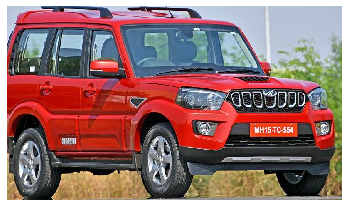

In [28]:
show_detected_objects(df.iloc[0])

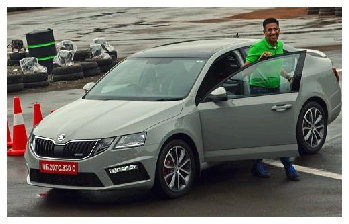

In [29]:
show_detected_objects(df.iloc[2])

### Preprocessing

We’ve already done a fair bit of preprocessing. A bit more is needed to convert the data into the format that Keras Retina understands:

First, let’s split the data into training and test datasets:

In [0]:
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = RANDOM_SEED)

In [32]:
train_df.head()

,image_name,top_x,top_y,bottom_x,bottom_y,class_name
183,number_plates/licensed_car_183.jpeg,169,260,358,298,license_plate
201,number_plates/licensed_car_201.jpeg,251,187,375,234,license_plate
230,number_plates/licensed_car_230.jpeg,140,149,324,220,license_plate
95,number_plates/licensed_car_95.jpeg,302,420,671,534,license_plate
190,number_plates/licensed_car_190.jpeg,115,86,227,117,license_plate


We need to write/create two CSV files for the annotations and classes:

In [0]:
ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'

We’ll use Pandas to write the annotations file, excluding the index and header:

In [0]:
train_df.to_csv(ANNOTATIONS_FILE, index=False, header=None)

We’ll use regular old file writer for the classes:

In [0]:
classes = set(['license_plate'])

with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(sorted(classes)):
    f.write('{},{}\n'.format(line,i))

In [37]:
!head annotations.csv

number_plates/licensed_car_183.jpeg,169,260,358,298,license_plate
number_plates/licensed_car_201.jpeg,251,187,375,234,license_plate
number_plates/licensed_car_230.jpeg,140,149,324,220,license_plate
number_plates/licensed_car_95.jpeg,302,420,671,534,license_plate
number_plates/licensed_car_190.jpeg,115,86,227,117,license_plate
number_plates/licensed_car_84.jpeg,103,209,258,276,license_plate
number_plates/licensed_car_158.jpeg,83,34,369,483,license_plate
number_plates/licensed_car_97.jpeg,123,117,221,170,license_plate
number_plates/licensed_car_147.jpeg,162,227,312,274,license_plate
number_plates/licensed_car_184.jpeg,100,148,259,208,license_plate


In [38]:
!head classes.csv

license_plate,0


### Training
You’re ready to finetune the model on the dataset. Let’s create a folder where we’re going to store the model checkpoints:

In [0]:
os.makedirs("snapshots", exist_ok=True)

You have two options at this point. Download the pre-trained model:

In [40]:
!gdown --id 1wPgOBoSks6bTIs9RzNvZf6HWROkciS8R --output snapshots/resnet50_csv_10.h5

/tensorflow-2.1.0/python3.6/pkg_resources/py2_warn.py:22: UserWarning: Setuptools will stop working on Python 2
************************************************************
You are running Setuptools on Python 2, which is no longer
supported and
>>> SETUPTOOLS WILL STOP WORKING <<<
in a subsequent release (no sooner than 2020-04-20).
Please ensure you are installing
Setuptools using pip 9.x or later or pin to `setuptools<45`
in your environment.
If you have done those things and are still encountering
this message, please comment in
https://github.com/pypa/setuptools/issues/1458
about the steps that led to this unsupported combination.
************************************************************
  sys.version_info < (3,) and warnings.warn(pre + "*" * 60 + msg + "*" * 60)
Downloading...
From: https://drive.google.com/uc?id=1wPgOBoSks6bTIs9RzNvZf6HWROkciS8R
To: /content/keras-retinanet/snapshots/resnet50_csv_10.h5
249MB [00:08, 29.5MB/s]


Or train the model on your own:  
Here, we save the weights of the pre-trained model on the Coco dataset.

In [47]:
PRETRAINED_MODEL = './snapshots/_pretrained_model.h5' # where the pre-trained model is going to save

#URL to the pre-trained model
URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to ./snapshots/_pretrained_model.h5


In [0]:
os.makedirs("bin", exist_ok=True)

The training script requires paths to the annotation, classes files, and the downloaded weights (along with other options):  
Make sure to choose an appropriate batch size, depending on your GPU. Also, the training might take a lot of time. Go get a hot cup of rakia, while waiting.

In [49]:
!keras_retinanet/bin/train.py \
 --freeze-backbone \
 --random-transform \
 --weights {PRETRAINED_MODEL} \
 --batch-size 8 \
 --steps 500 \
 --epochs 10 \
 csv annotations.csv classes.csv

/bin/bash: keras_retinanet/bin/train.py: No such file or directory


In [43]:
!pwd

/content/keras-retinanet
